In [1]:
!pip install pycaret


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 67.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 94.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 95.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 65.5 MB/s eta 0:00:00
   ━━━━

In [2]:
from pycaret.datasets import get_data

# Load the credit dataset
from pycaret.clustering import *
from pycaret.datasets import get_data

# Load a sample dataset
data = get_data('credit')

# Display the first few rows of the dataset
print(data.head())

# Display basic information about the dataset
print(data.info())

# Display summary statistics of the dataset
print(data.describe())

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
0      20000    2          2         1   24      2      2     -1     -1   
1      90000    2          2         2   34      0      0      0      0   
2      50000    2          2         1   37      0      0      0      0   
3      50000    1          2         1   57     -1      0     -1      0   
4      50000    1          1         2   37      0      0      0      0   

   PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0     -2  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1      0  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
2      0  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
3      0  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   
4      0  ...    19394.0    19619.0    20024.0    2500.0    1815.0     657.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default  
0       0.0       0.0       0.0        1  
1    1000.0    1000.0    5000.0        0  
2    1100.0    1069.0    1000.0        0  
3    9000.0     689.0     679.0        0  
4    1000.0    1000.0     800.0        0  

[5 rows x 24 columns]

   LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
0      20000    2          2         1   24      2      2     -1     -1   
1      90000    2          2         2   34      0      0      0      0   
2      50000    2          2         1   37      0      0      0      0   
3      50000    1          2         1   57     -1      0     -1      0   
4      50000    1          1         2   37      0      0      0      0   

   PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0     -2  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1      0  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
2      0  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
3      0  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   
4      0  ...    19394.0    19619.0    20024.0    2500.0    1815.0     657.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default  
0       0.0       0.0    

In [3]:
data.shape


(24000, 24)

In [4]:
# Initialize the setup
setup(data, normalize=True, ignore_features=['ID_column_if_any'])

In [5]:
# Create DBSCAN model
dbscan_model = create_model('dbscan')

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [9]:
# Print the model results
print(dbscan_model)

# Plot the clusters
plot_model(dbscan_model, plot='cluster')


DBSCAN(n_jobs=-1)


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

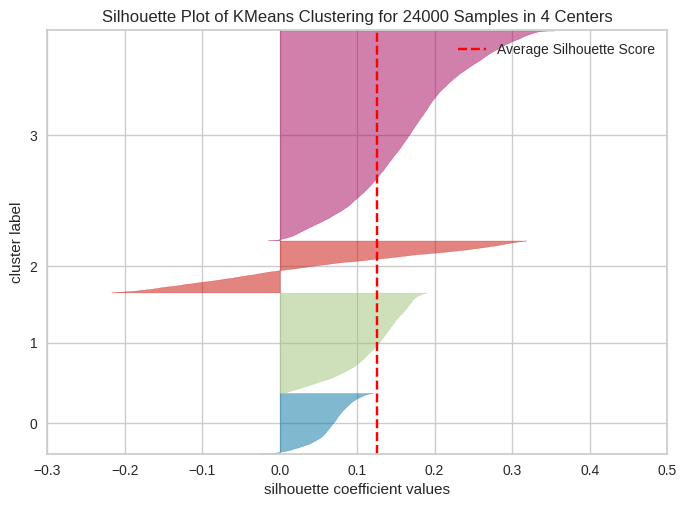

In [10]:
kmeans_model = create_model('kmeans')
plot_model(kmeans_model, plot='silhouette')

In [11]:
evaluate_model(dbscan_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [12]:
from pycaret.datasets import get_data
dataset = get_data('mice')

MouseID  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
0   309_1  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830   
1   309_2  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636   
2   309_3  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011   
3   309_4  0.442107  0.617076  0.358626  2.466947  4.979503  0.222886   
4   309_5  0.434940  0.617430  0.358802  2.365785  4.718679  0.213106   

    pBRAF_N  pCAMKII_N   pCREB_N  ...   pCFOS_N     SYP_N  H3AcK18_N  \
0  0.177565   2.373744  0.232224  ...  0.108336  0.427099   0.114783   
1  0.172817   2.292150  0.226972  ...  0.104315  0.441581   0.111974   
2  0.175722   2.283337  0.230247  ...  0.106219  0.435777   0.111883   
3  0.176463   2.152301  0.207004  ...  0.111262  0.391691   0.130405   
4  0.173627   2.134014  0.192158  ...  0.110694  0.434154   0.118481   

     EGR1_N  H3MeK4_N    CaNA_N  Genotype  Treatment  Behavior   class  
0  0.131790  0.128186  1.675652   Control  Memantine       C/S  c-CS-m  
1  0.135103  0.131119  1.743610   Control  Memantine       C/S  c-CS-m  
2  0.133362  0.127431  1.926427   Control  Memantine       C/S  c-CS-m  
3  0.147444  0.146901  1.700563   Control  Memantine       C/S  c-CS-m  
4  0.140314  0.148380  1.839730   Control  Memantine       C/S  c-CS-m  

[5 rows x 82 columns]

In [13]:
from pycaret.datasets import get_data
dataset = get_data('mice')

MouseID  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
0   309_1  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830   
1   309_2  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636   
2   309_3  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011   
3   309_4  0.442107  0.617076  0.358626  2.466947  4.979503  0.222886   
4   309_5  0.434940  0.617430  0.358802  2.365785  4.718679  0.213106   

    pBRAF_N  pCAMKII_N   pCREB_N  ...   pCFOS_N     SYP_N  H3AcK18_N  \
0  0.177565   2.373744  0.232224  ...  0.108336  0.427099   0.114783   
1  0.172817   2.292150  0.226972  ...  0.104315  0.441581   0.111974   
2  0.175722   2.283337  0.230247  ...  0.106219  0.435777   0.111883   
3  0.176463   2.152301  0.207004  ...  0.111262  0.391691   0.130405   
4  0.173627   2.134014  0.192158  ...  0.110694  0.434154   0.118481   

     EGR1_N  H3MeK4_N    CaNA_N  Genotype  Treatment  Behavior   class  
0  0.131790  0.128186  1.675652   Control  Memantine       C/S  c-CS-m  
1  0.135103  0.131119  1.743610   Control  Memantine       C/S  c-CS-m  
2  0.133362  0.127431  1.926427   Control  Memantine       C/S  c-CS-m  
3  0.147444  0.146901  1.700563   Control  Memantine       C/S  c-CS-m  
4  0.140314  0.148380  1.839730   Control  Memantine       C/S  c-CS-m  

[5 rows x 82 columns]

In [14]:
dataset.shape


(1080, 82)

In [15]:
data = dataset.sample(frac=0.95, random_state=786).reset_index(drop=True)
data_unseen = dataset.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))


Data for Modeling: (1026, 82)
Unseen Data For Predictions: (54, 82)


In [16]:
from pycaret.clustering import *


In [17]:
exp_clu101 = setup(data, normalize = True,
                   ignore_features = ['MouseID'],
                   session_id = 123)

In [18]:
kmeans = create_model('kmeans')


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [19]:
kmean_results = assign_model(kmeans)
kmean_results.head()

DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
0  0.344930  0.626194  0.383583  2.534561  4.097317  0.303547  0.222829   
1  0.630001  0.839187  0.357777  2.651229  4.261675  0.253184  0.185257   
2  0.555122  0.726229  0.278319  2.097249  2.897552  0.222222  0.174356   
3  0.275849  0.430764  0.285166  2.265254  3.250091  0.189258  0.157837   
4  0.304788  0.617299  0.335164  2.638236  4.876609  0.280590  0.199417   

   pCAMKII_N   pCREB_N    pELK_N  ...     SYP_N  H3AcK18_N    EGR1_N  \
0   4.592770  0.239427  1.360164  ...  0.455172   0.252700  0.218868   
1   3.816673  0.204940  1.716583  ...  0.496423   0.155008  0.153219   
2   1.867880  0.203379  1.610137  ...  0.344964   0.136109  0.155530   
3   2.917610  0.202594  1.734746  ...  0.390880   0.127944  0.207671   
4   4.835421  0.236314  1.226532  ...  0.470932   0.245277  0.202171   

   H3MeK4_N    CaNA_N  Genotype  Treatment  Behavior   class    Cluster  
0  0.249187  1.139493    Ts65Dn  Memantine       S/C  t-SC-m  Cluster 0  
1       NaN  1.642886   Control  Memantine       C/S  c-CS-m  Cluster 3  
2  0.185484  1.657670    Ts65Dn  Memantine       C/S  t-CS-m  Cluster 1  
3  0.175357  0.893598   Control     Saline       S/C  c-SC-s  Cluster 1  
4  0.240372  0.795637    Ts65Dn  Memantine       S/C  t-SC-m  Cluster 0  

[5 rows x 82 columns]

In [20]:
plot_model(kmeans)


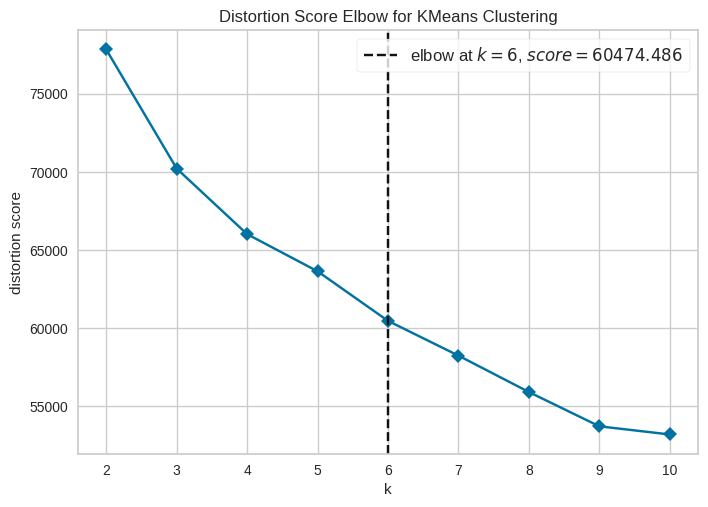

In [21]:
plot_model(kmeans, plot = 'elbow')


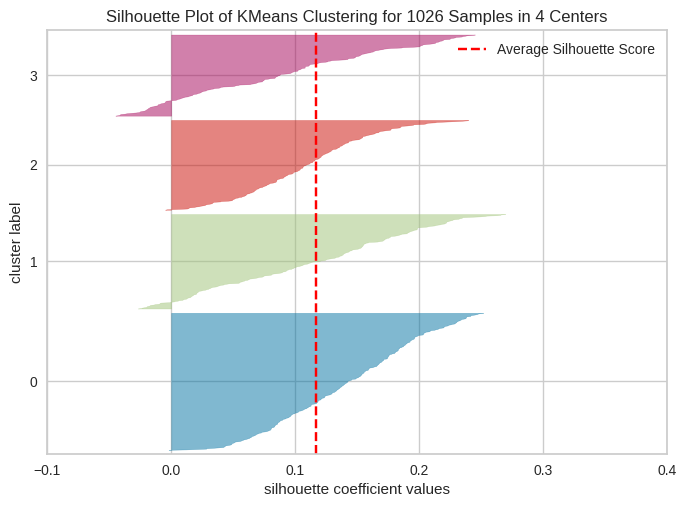

In [22]:
plot_model(kmeans, plot = 'silhouette')


In [23]:
plot_model(kmeans, plot = 'distribution') #to see size of clusters


In [24]:
plot_model(kmeans, plot = 'distribution', feature = 'class')


In [25]:
plot_model(kmeans, plot = 'distribution', feature = 'CaNA_N')


In [26]:
unseen_predictions = predict_model(kmeans, data=data_unseen)
unseen_predictions.head()

DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
0 -0.256365 -0.201008  1.148943  1.383727  0.659590  0.726105  2.123381   
1 -0.388869 -0.452527  0.138908  0.552693  0.093004 -0.038028  0.519081   
2 -0.393147 -0.463551  0.888753  0.325227 -0.046213 -0.156672  0.201324   
3 -0.192166 -0.351892  1.217933  1.136025  0.149366  0.818752  1.772891   
4 -0.231714 -0.552275  0.547501  0.173448 -0.300643  0.466364  1.659732   

   pCAMKII_N   pCREB_N    pELK_N  ...  Behavior  class_t-SC-m  class_c-CS-m  \
0   1.927273  0.522037  0.583216  ...  0.976875      -0.36907     -0.400791   
1   1.385232 -0.067088 -0.153355  ...  0.976875      -0.36907     -0.400791   
2   1.380311 -0.292262 -0.408424  ...  0.976875      -0.36907     -0.400791   
3   1.465211  0.457038  0.492696  ...  0.976875      -0.36907     -0.400791   
4   1.024140 -0.258884 -0.050291  ...  0.976875      -0.36907     -0.400791   

   class_t-CS-m  class_c-SC-s  class_c-SC-m  class_t-SC-s  class_c-CS-s  \
0     -0.380906     -0.380906     -0.400791       2.62532     -0.379226   
1     -0.380906     -0.380906     -0.400791       2.62532     -0.379226   
2     -0.380906     -0.380906     -0.400791       2.62532     -0.379226   
3     -0.380906     -0.380906     -0.400791       2.62532     -0.379226   
4     -0.380906     -0.380906     -0.400791       2.62532     -0.379226   

   class_t-CS-s    Cluster  
0      -0.32862  Cluster 2  
1      -0.32862  Cluster 2  
2      -0.32862  Cluster 2  
3      -0.32862  Cluster 2  
4      -0.32862  Cluster 2  

[5 rows x 89 columns]

In [27]:
save_model(kmeans,'Final Kmeans Model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['DYRK1A_N', 'ITSN1_N', 'BDNF_N',
                                              'NR1_N', 'NR2A_N', 'pAKT_N',
                                              'pBRAF_N', 'pCAMKII_N', 'pCREB_N',
                                              'pELK_N', 'pERK_N', 'pJNK_N',
                                              'PKCA_N', 'pMEK_N', 'pNR1_N',
                                              'pNR2A_N', 'pNR2B_N', 'pPKCAB_N',
                                              'pRSK_N', 'AKT_N', 'BRAF_N',
                                              'CAMKII_N', 'CREB_N', 'ELK_N',
                                              'ERK_N', 'GSK3B_N', 'JNK_N',
                                              'ME...
 dtype: int64},
                                                                         {'col': 'Behavior',
                                                                 

In [28]:
saved_kmeans = load_model('Final Kmeans Model')


Transformation Pipeline and Model Successfully Loaded


In [29]:
new_prediction = predict_model(saved_kmeans, data=data_unseen)


In [30]:
new_prediction.head()


DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
0  0.361782  0.565987  0.376145  2.774771  4.450250  0.262906  0.238968   
1  0.329361  0.503216  0.326145  2.487893  3.925842  0.231177  0.195611   
2  0.328314  0.500465  0.363265  2.409370  3.796988  0.226250  0.187024   
3  0.377490  0.528331  0.379560  2.689263  3.978008  0.266753  0.229495   
4  0.367813  0.478322  0.346371  2.356975  3.561499  0.252121  0.226437   

   pCAMKII_N   pCREB_N    pELK_N  ...     SYP_N  H3AcK18_N  EGR1_N  H3MeK4_N  \
0   6.041008  0.229808  1.697336  ...  0.360485   0.208611     NaN  0.270820   
1   5.337306  0.210556  1.355846  ...  0.391032   0.211478     NaN  0.255582   
2   5.330916  0.203198  1.237591  ...  0.394725   0.201974     NaN  0.241815   
3   5.441138  0.227684  1.655369  ...  0.388407   0.262620     NaN  0.262620   
4   4.868520  0.204288  1.403629  ...  0.360577   0.264670     NaN  0.247165   

     CaNA_N  Genotype  Treatment  Behavior   class    Cluster  
0  0.782176    Ts65Dn     Saline       S/C  t-SC-s  Cluster 2  
1  0.882451    Ts65Dn     Saline       S/C  t-SC-s  Cluster 2  
2  0.881029    Ts65Dn     Saline       S/C  t-SC-s  Cluster 2  
3  0.781328    Ts65Dn     Saline       S/C  t-SC-s  Cluster 2  
4  0.783654    Ts65Dn     Saline       S/C  t-SC-s  Cluster 2  

[5 rows x 82 columns]